# Logistic regression

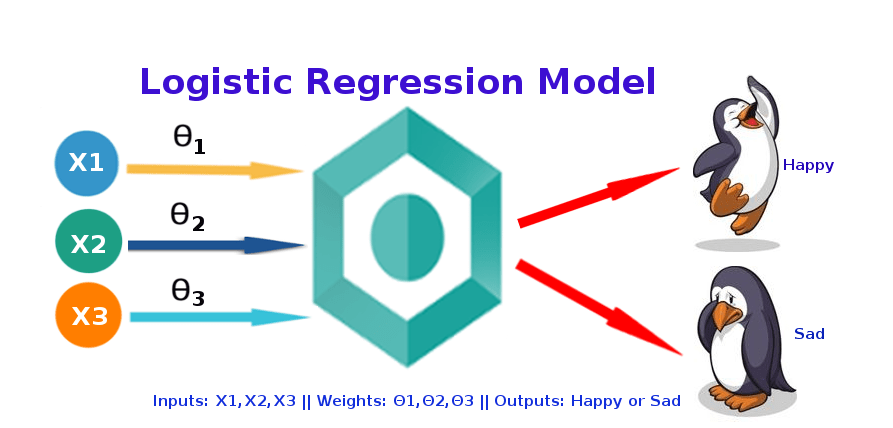

Logistic Regression is one of the basic and popular algorithm to solve a classification problem. It is named as ‘Logistic Regression’, because it’s underlying technique is quite the same as Linear Regression. The term “Logistic” is taken from the Logit function that is used in this method of classification.

What is a Classification Problem?

We identify problem as classification problem when independent variables are continuous in nature and dependent variable is in categorical form i.e. in classes like positive class and negative class. The real life example of classification example would be, to categorize the mail as spam or not spam, to categorize the tumor as malignant or benign and to categorize the transaction as fraudulent or genuine. All these problem’s answers are in categorical form i.e. Yes or No. and that is why they are two class classification problems.

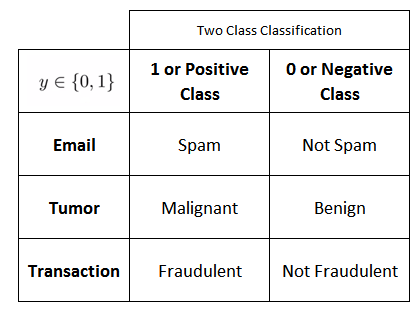

Although, sometime we come across more than 2 classes and still it is a classification problem. These types of problems are known as multi class classification problems.


Why not use Linear Regression?

Suppose we have a data of tumor size vs its malignancy. As it is a classification problem, if we plot, we can see, all the values will lie on 0 and 1. And if we fit best found regression line, by assuming the threshold at 0.5, we can do line pretty reasonable job.
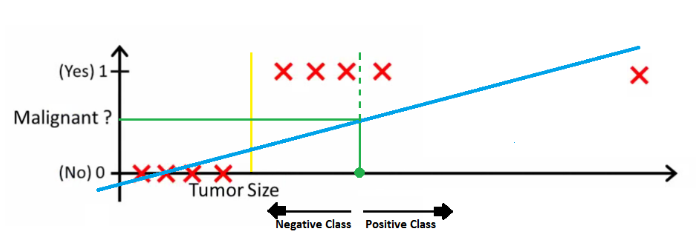
We can decide the point on the x axis from where all the values lie to its left side are considered as negative class and all the values lie to its right side are positive class.
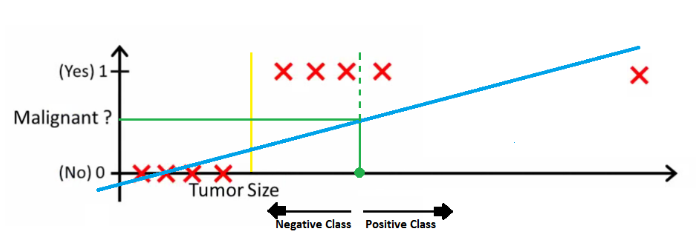
But what if there is an outlier in the data. Things would get pretty messy. For example, for 0.5 threshold,
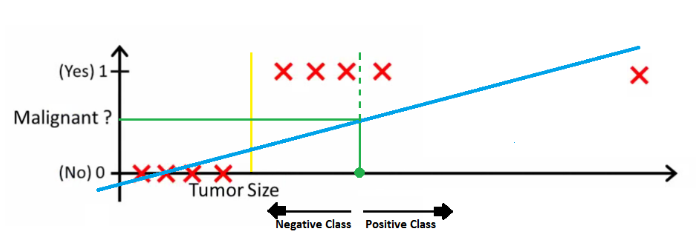
If we fit best found regression line, it still won’t be enough to decide any point by which we can differentiate classes. It will put some positive class examples into negative class. The green dotted line (Decision Boundary) is dividing malignant tumors from benign tumors but the line should have been at a yellow line which is clearly dividing the positive and negative examples. So just a single outlier is disturbing the whole linear regression predictions. And that is where logistic regression comes into a picture.

# LogisticRegression in Amazon Fine Food Reviews Analysis - Full Dataset

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

# Objective :-

Here we have to apply logistic-regresion classfication Alogoritm in various method for AMZON fine food review and check which 
method is very good.

1). Train,CV and test the data.

2). Here we are going to perform Both GridsearchCV and RandomsearchCV for cossvalidation for finding best lambda.

3). We  are going to use both L1 and L2 regularizer as esatic-net is not implemented in sklearn.

4). With l1 regularizer we going to increaing the lambda value and check what happened to sparsity of data , will it increase 
   or decrease .
   
5). We will do the pretabation for getting if the dataset is multicolinear or not and get the most weighted featre.

In [2]:
os.getcwd()

'C:\\Users\\Nicky\\Desktop\\my work\\logisticregrassion'

In [3]:
#Importing the nessary library for this assignement .
import numpy as np
import pandas as pd
import sqlite3 as sql
from time import time
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#Peforemance measurment techniques
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm #for Instantly make your loops show a smart progress meter

In [7]:
#Functions to save objects for later use and retireve it
def export(obj,filename):
    pickle.dump(obj,open(filename+".dmp","wb"))
def import1(filename):
    temp = pickle.load(open(filename+".dmp","rb"))
    return temp

# Loading the cleaned data

In [4]:
#Using sqlite3 to retrieve data from sqlite file

con = sql.connect("final.sqlite")#Loading Cleaned/ Preprocesed text that we did in Text Preprocessing

#Using pandas functions to query from sql table
food1 = pd.read_sql_query("""
SELECT * FROM Reviews 
""",con)

#Reviews is the name of the table given
#Taking only the data where score != 3 as score 3 will be neutral and it won't help us much
food1.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,b'june saw charm group rose begin droop pep ch...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...


In [5]:
food1.groupby('Score').count()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,CleanedText
Score,,,,,,,,,,,
negative,57107,57107,57107,57107,57107,57107,57107,57107,57107,57107,57107
positive,336824,336824,336824,336824,336824,336824,336824,336824,336824,336824,336824


In [8]:
def label(x):
    if x == "positive":
        return 1
    else:
        return -1
food1["Score"] = food1["Score"].map(label) #Map all the scores as the function polarity i.e. positive or negative
food1=food1.sample(25000)

export(food1,'food1')

In [9]:
food1.groupby('Score').head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
6867,308524,308525,B0000UVRDY,A3I2WF424J6Y9Z,John A. Kasperowicz,2,2,-1,1159920000,Small 8oz jar and no special taste,I bought two jars of this blood orange marmala...,b'bought two jar blood orang marmalad base gre...
193556,185979,185980,B001EO617W,A1YLXWLL089Z6P,ivy,0,0,-1,1330819200,love it,Honey water is good for your health.<br /><br ...,b'honey water good health good product easi po...


In [10]:
#help(food1.sample)
food1.sort_values('Time',inplace=True)

In [11]:
food1=import1('food1')

# Bag of Words (BoW)

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. In this model, a text is represented as the bag of its words, disregarding grammar and even word order but keeping multiplicity.

In [90]:
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(food1['CleanedText'].values,food1['Score'].values,test_size=0.3,shuffle=False)

#Text -> Uni gram Vectors
bi_gram = CountVectorizer(ngram_range=(1,2)) 
X_train = bi_gram.fit_transform(X_train)
#normalize the data
X_train = preprocessing.normalize(X_train) #normalization of data has better accurac than mean centering and scalling
print("Train Data Size: ",X_train.shape)
X_test = bi_gram.transform(X_test)
#normalize the data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (275751, 2426286)
Test Data Size:  (118180, 2426286)


In [28]:
export(X_train,"X_train")
export(X_test,"X_test")
export(y_train,"y_train")
export(y_test,"y_test")

In [101]:
X_train=import1('X_train')
X_test=import1('X_test')
y_train=import1('y_train')
y_test=import1('y_test')

In [27]:
from sklearn.model_selection import TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=5)

# GridSearchCV

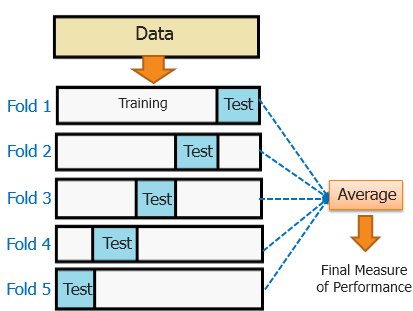

In [16]:
from sklearn.model_selection import TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=5)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 40.1min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 104.9min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed: 115.5min finished


Best HyperParameter:  {'C': 50, 'penalty': 'l2'}
Best Accuracy: 91.98%


# Error Vs C or lambda Graph

grid_scores_ has been deprecated for that reason we are using cv_result_for getting the score and param

In [1]:
test_score=gsv.cv_results_.get('mean_test_score') 
param=gsv.cv_results_.get('params')
test_score=test_score.tolist()
scores=list(zip(test_score,param))

NameError: name 'gsv' is not defined

No handles with labels found to put in legend.


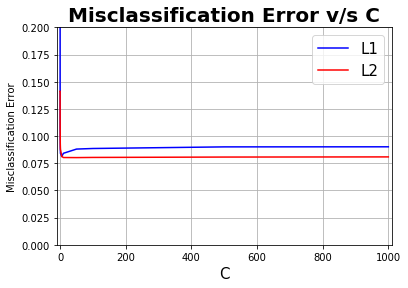

In [45]:
warnings.filterwarnings('ignore')
def error_vs_c(scores):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for a in scores:
        if (a[1]['penalty']) == 'l1':
            y1.append(1-a[0])
            x1.append(a[1]['C'])
        else:
            y2.append(1-a[0])
            x2.append(a[1]['C'])
    _, ax = plt.subplots(1,1)
    plt.xlim(-10,1010)
    plt.ylim(0,0.2)
    ax.set_xlabel("C",fontsize=15)
    ax.set_ylabel("Misclassification Error")
    ax.set_title('Misclassification Error v/s C for TFIDF', fontsize=20, fontweight='bold')
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend(loc="best", fontsize=15)
    ax.plot()
gsv=import1('gsv_bigram')
error_vs_c(scores)

Wall time: 0 ns
Accuracy on test data set: 92.328%
Precision on test data set: 0.942
Recall on test data set: 0.969
F1-Score on test data set: 0.955
Non Zero weights: 2426286
Confusion Matrix of test data set:
 [ [TN  FN]
 [FP TP] ]



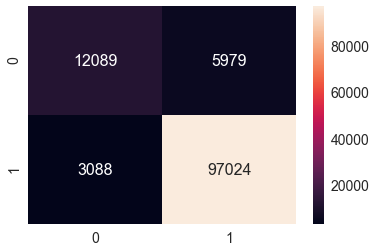

In [48]:
%time
import seaborn as sns
#Testing Accuracy on Test data
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C= 50, penalty= 'l2')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test data set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test data set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test data set: %0.3f"%(f1_score(y_test, y_pred)))
print("Non Zero weights:",np.count_nonzero(clf.coef_))
print("Confusion Matrix of test data set:\n [ [TN  FN]\n [FP TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Now we have to check the sparcity by increasing lambda or decreasing the c value for l1 regularizer

In [55]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=10, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test data set: 91.892%
Non Zero weights: 33238


In [56]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=1, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test data set: 92.017%
Non Zero weights: 2775


In [57]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=.1, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test data set: 90.390%
Non Zero weights: 442


In [58]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=.01, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test data set: 86.040%
Non Zero weights: 57


In [59]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=.001, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(clf.coef_))

Accuracy on test data set: 84.711%
Non Zero weights: 2


Here we can able to see increasing the value of lambada our accuracy going down but for low latency system high lambada value required

# Perturbation  Test

In this Test we going to check if dataset are multicolinear or not , In this method we going to add some nosie to the data i.e episilon and test the data ,if weight vector has significat change then data is multicolinear

In [61]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=10, penalty= 'l2')
alogo.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 92.399%
Non Zero weights: 2426286


In [67]:
from scipy.sparse import find #Return the indices and values of the nonzero elements of a matrix
before_weight=find(alogo.coef_[0])[2]
print(before_weight[:10])

[ 0.14092486  0.13966513  0.00125973  0.46554261  0.36932168  0.00565553
 -0.16601428  0.08070586  0.02248112  0.10705417]


In [93]:
pre_X_train=X_train
epsilon = np.random.normal(loc=0.0, scale=0.000000001, size=(find(pre_X_train)[0].size,))
i,j,v = find(pre_X_train)
pre_X_train[i,j]=pre_X_train[i,j]+epsilon #adding noise to he small nosie N(0,.001) to training data

In [94]:
alogo = LogisticRegression(C=10, penalty= 'l2')
alogo.fit(pre_X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 92.399%
Non Zero weights: 2426286


In [95]:
After_weight=find(alogo.coef_[0])[2]
print(before_weight[:10])

[ 0.14092486  0.13966513  0.00125973  0.46554261  0.36932168  0.00565553
 -0.16601428  0.08070586  0.02248112  0.10705417]


In [96]:
weights_diff = (abs(before_weight - After_weight)/before_weight) * 100
print(weights_diff)

[0.03394321 0.03417638 0.00814533 ... 0.00572689 0.00915693 0.00915557]


In [83]:
weights_diff.size

2426286

In [98]:
print(weights_diff[np.where(weights_diff > 30)].size)

89


 89 features have weight changes greater than 40%. Hence the features are multicollinear

# Most 25 Important feature for BOW

code snippet https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

In [86]:
bi_gram = CountVectorizer(ngram_range=(1,2))

In [100]:
def important_feature(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\tNegative\t\t\t\t\t\tPositive")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
important_feature(bi_gram,alogo)


		Negative						Positive
________________________________________________________________________________________________
	-18.9253	two star       				17.3147	not disappoint 
	-16.4987	worst          				13.0208	high recommend 
	-15.2932	not recommend  				12.1850	wont disappoint
	-13.2275	not happi      				11.9633	not bad        
	-12.4134	not worth      				10.3891	delici         
	-12.3486	tasteless      				10.3789	three star     
	-12.0367	aw             				10.2090	hook           
	-11.8483	terribl        				10.0665	perfect        
	-11.7008	disgust        				9.7252	amaz           
	-11.2448	never buy      				9.5774	not overpow    
	-11.0560	threw          				9.4568	addict         
	-10.7913	yuck           				9.4036	awesom         
	-10.6167	doesnt work    				9.1074	never disappoint
	-10.3890	disappoint     				9.0617	excel          
	-10.3631	undrink        				8.9915	downsid        
	-10.3143	dont recommend 				8.9334	pleasant surpris
	-10.0394	horribl        				8.7784	

# RandomizedSearchCV

In [103]:
from sklearn.model_selection import RandomizedSearchCV
alogo = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
bi_rsv = RandomizedSearchCV(alogo,param_grid,cv=timesplit,verbose=1,n_jobs=-1)
bi_rsv.fit(X_train,y_train)
export(bi_rsv,"bi_rsv")
print("Best HyperParameter: ",bi_rsv.best_params_)
print("Best Accuracy: %.2f%%"%(bi_rsv.best_score_*100))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.1min finished


Best HyperParameter:  {'penalty': 'l1', 'C': 5}
Best Accuracy: 91.96%


Accuracy on test data set: 92.235%
Precision on test data set: 0.943
Recall on test data set: 0.966
F1-Score on test data set: 0.955
Non Zero weights: 18609
Confusion Matrix of test data set:
 [ [TN  FN]
 [FP TP] ]



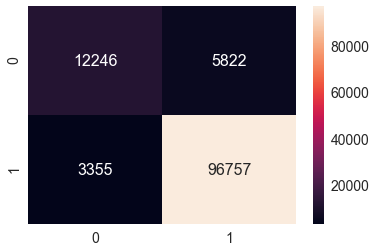

In [104]:
import seaborn as sns
#Testing Accuracy on Test data
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C= 5, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test data set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test data set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test data set: %0.3f"%(f1_score(y_test, y_pred)))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))
print("Confusion Matrix of test data set:\n [ [TN  FN]\n [FP TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# TF-IDF

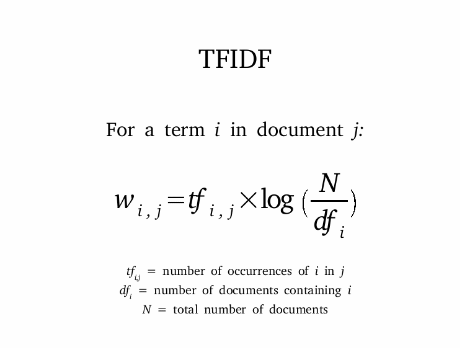

In [44]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(food1['CleanedText'].values,food1['Score'].values,test_size=0.3,shuffle=False)

tfidf_vec = TfidfVectorizer(ngram_range=(1,2)) #Using bi-grams
X_train = tfidf_vec.fit_transform(X_train)
#Normalize Data
X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf_vec.transform(X_test)
#Normalize Data
X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (275751, 2434834)
Test Data Size:  (118180, 2434834)
Wall time: 1min 6s


In [46]:
from sklearn.model_selection import TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=5)

In [7]:
%%time
alogo = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(alogo,param_grid,cv=timesplit,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
export(gsv,"gsv_bigram")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 26.4min finished


Best HyperParameter:  {'C': 1000, 'penalty': 'l2'}
Best Accuracy: 92.05%
Wall time: 28min 15s


# Error Vs C or lambda Graph

grid_scores_ has been deprecated for that reason we are using cv_result_for getting the score and param

In [21]:
test_score=gsv.cv_results_.get('mean_test_score') 
param=gsv.cv_results_.get('params')
test_score=test_score.tolist()
scores=list(zip(test_score,param))

No handles with labels found to put in legend.


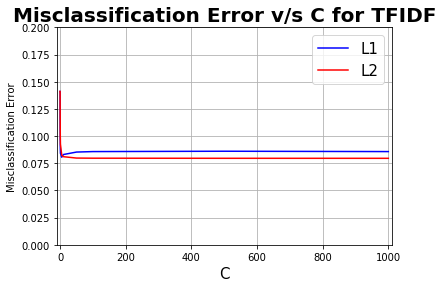

In [28]:
warnings.filterwarnings('ignore')
def error_vs_c(scores):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for a in scores:
        if (a[1]['penalty']) == 'l1':
            y1.append(1-a[0])
            x1.append(a[1]['C'])
        else:
            y2.append(1-a[0])
            x2.append(a[1]['C'])
    _, ax = plt.subplots(1,1)
    plt.xlim(-10,1010)
    plt.ylim(0,0.2)
    ax.set_xlabel("C",fontsize=15)
    ax.set_ylabel("Misclassification Error")
    ax.set_title('Misclassification Error v/s C for TFIDF', fontsize=20, fontweight='bold')
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    plt.plot(x1,y1,'b',label="L1")
    plt.plot(x2,y2,'r',label="L2")
    plt.legend(loc="best", fontsize=15)
    ax.plot()
gsv=import1('gsv_bigram')
error_vs_c(scores)

Accuracy on test data set: 92.277%
Precision on test data set: 0.942
Recall on test data set: 0.968
F1-Score on test data set: 0.955
Non Zero weights: 2426286
Confusion Matrix of test data set:
 [ [TN  FN]
 [FP TP] ]

Wall time: 1min 41s


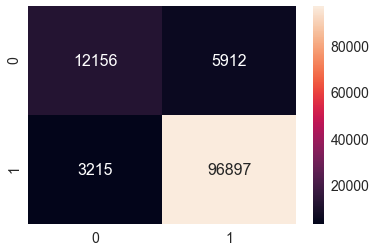

In [12]:
%%time
import seaborn as sns
#Testing Accuracy on Test data
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C= 1000, penalty= 'l2')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test data set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test data set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test data set: %0.3f"%(f1_score(y_test, y_pred)))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))
print("Confusion Matrix of test data set:\n [ [TN  FN]\n [FP TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Now we have to check the sparcity by increasing lambda or decreasing the c value for l1 regularizer for TFIDF

In [18]:
%%time
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=500, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 91.407%
Non Zero weights: 62983
Wall time: 1min 3s


In [19]:
%%time
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=50, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 91.562%
Non Zero weights: 51744
Wall time: 1min 26s


In [20]:
%%time
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=.1, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 90.071%
Non Zero weights: 334
Wall time: 24.3 s


In [21]:
%%time
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=.01, penalty= 'l1')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 85.005%
Non Zero weights: 19
Wall time: 23.5 s


# Perturbation Test on TFIDF

In [33]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=1000, penalty= 'l2')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 92.277%
Non Zero weights: 2426286


In [34]:
from scipy.sparse import find #Return the indices and values of the nonzero elements of a matrix
before_weight=find(alogo.coef_[0])[2]
print(before_weight[:10])

[ 0.43892952  0.45127703  0.00197187  1.29224674  1.35691646  0.01355868
 -0.90820335  0.39146482  0.10482563  0.336969  ]


In [35]:
pre_X_train=X_train
epsilon = np.random.normal(loc=0.0, scale=0.000000001, size=(find(pre_X_train)[0].size,))
i,j,v = find(pre_X_train)
pre_X_train[i,j]=pre_X_train[i,j]+epsilon #adding noise to he small nosie N(0,0.000000001) to training data

In [36]:
alogo = LogisticRegression(C=10, penalty= 'l2')
alogo.fit(pre_X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 92.376%
Non Zero weights: 2426286


In [37]:
After_weight=find(alogo.coef_[0])[2]
print(before_weight[:10])

[ 0.43892952  0.45127703  0.00197187  1.29224674  1.35691646  0.01355868
 -0.90820335  0.39146482  0.10482563  0.336969  ]


In [38]:
weights_diff = (abs(before_weight - After_weight)/before_weight) * 100
print(weights_diff)

[65.18078178 65.33855026 29.07439108 ... 69.5781033  21.3151206
 21.31512055]


In [40]:
print(weights_diff[np.where(weights_diff > 40)].size)

1356673


Here we can able to see 1356673 feature are multicolinear in TFIDF technique

# Most 25 Important feature for TFIDF

In [45]:
def important_feature(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\tNegative\t\t\t\t\t\tPositive")
    print("________________________________________________________________________________________________")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%.4f\t%-15s\t\t\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
important_feature(tfidf_vec,alogo)

		Negative						Positive
________________________________________________________________________________________________
	-20.0445	wont soon      				23.4348	granul keep    
	-18.4750	direct lipton  				19.7029	degre classic  
	-17.3834	nose brand     				19.5958	best brazil    
	-16.8815	tuna tbl       				17.9116	pentahydr vitamin
	-15.6545	teeccino blend 				17.8695	lost sight     
	-15.2802	avoid pull     				17.4202	noodl shred    
	-13.6494	tannin experi  				16.7184	goe compet     
	-13.6194	not clam       				16.1828	hes enjoy      
	-13.4615	discov flavrz  				15.1302	evilspeak provid
	-13.3946	think spring   				14.2464	nonpublish     
	-13.3111	honeyvill make 				13.9002	amanda richard 
	-12.4450	normailli      				13.3149	hand scrape    
	-12.2197	respond next   				12.3170	new card       
	-12.1051	nori make      				12.3040	away trade     
	-12.0200	need tip       				11.8317	add wheat      
	-11.4556	grill winter   				11.7947	taper trunk    
	-11.1628	yes powder     		

# RandomizedSearchCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV
alogo = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
bi_rsv = RandomizedSearchCV(alogo,param_grid,cv=timesplit,verbose=1,n_jobs=-1)
bi_rsv.fit(X_train,y_train)
export(bi_rsv,"bi_rsv")
print("Best HyperParameter: ",bi_rsv.best_params_)
print("Best Accuracy: %.2f%%"%(bi_rsv.best_score_*100))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.5min finished


Best HyperParameter:  {'penalty': 'l2', 'C': 500}
Best Accuracy: 91.75%


Accuracy on test data set: 91.959%
Precision on test data set: 0.939
Recall on test data set: 0.967
F1-Score on test data set: 0.953
Non Zero weights: 2434834
Confusion Matrix of test data set:
 [ [TN  FN]
 [FP TP] ]



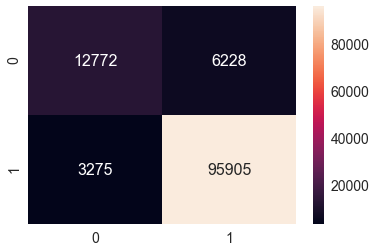

In [48]:
import seaborn as sns
#Testing Accuracy on Test data
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C= 500, penalty= 'l2')
alogo.fit(X_train,y_train)
y_pred = alogo.predict(X_test)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test data set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test data set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test data set: %0.3f"%(f1_score(y_test, y_pred)))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))
print("Confusion Matrix of test data set:\n [ [TN  FN]\n [FP TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Clean the text with no stem for avgw2v and tfidf-w2v model

In [20]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
stop.remove('not')
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'haven', 'few', 'me', 'whom', 'doing', "she's", 'my', "you've", 'this', 'same', 'm', 're', 'y', 'or', 'those', 'himself', 'only', 'shan', "doesn't", 'most', 'won', "it's", 'into', 'itself', 'them', 'here', 'will', 'mustn', 'why', 'they', 'theirs', 'themselves', 'd', 'where', 'a', "that'll", 'with', "shan't", "couldn't", 'was', 'do', 'doesn', 'for', 'than', 'over', 'how', "should've", 'does', 'no', 'yourself', 'there', 'these', 'up', 'did', 'it', 'wouldn', 'between', 'but', 'more', 'can', 'has', 'll', 'down', 'against', 'after', "hasn't", 'any', 'nor', 'their', 'its', 've', 'while', 'just', 'under', 'should', 'above', 'i', 'don', 'is', 'then', 'until', 'at', 'before', 'during', 'other', 'didn', 'you', 'ourselves', 'which', 'her', 'were', 'we', "won't", 'if', 'yourselves', 'about', 'isn', 'now', 'him', "isn't", 'needn', 'the', 'when', 'are', "didn't", "aren't", 'ma', 'aren', 'hers', 'o', "needn't", 'on', "shouldn't", 'of', 'had', "mustn't", 'be', 'herself', 'shouldn', 'having', 'been', 

# Spliting the train and test data before running any model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(food1['Text'].values,food1['Score'].values,test_size=0.3,shuffle=False)

In [57]:
i=0
train_list_of_sent=[]
for sent in X_train:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    train_list_of_sent.append(filtered_sentence)

In [67]:
print(len(train_list_of_sent))
export(train_list_of_sent,'train_list_of_sent')

275751


In [21]:
i=0
Test_list_of_sent=[]
for sent in X_test:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    Test_list_of_sent.append(filtered_sentence)

In [68]:
print(len(Test_list_of_sent))
export(Test_list_of_sent,'Test_list_of_sent')

118180


# w2v model

Here we are using the google trained w2v model.
1. for using the w2v model , minimum 16 GB RAM required . so please carefull about it 

In [7]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Avg w2v model

Convert all the words to vectors and then just take the avg of the vectors the resulting vector represent the sentence

In [63]:
%%time
#np.seterr(divide='ignore', invalid='ignore')
# average Word2Vec
# compute average word2vec for each review.
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in train_list_of_sent: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))
export(train_sent_vectors,'train_sent_vectors')

275751
300
Wall time: 3min 54s


In [64]:
train_sent_vectors = np.array(train_sent_vectors)

In [65]:
np.isnan(train_sent_vectors).any()

False

In [23]:
%%time
#np.seterr(divide='ignore', invalid='ignore')
# average Word2Vec
# compute average word2vec for each review.
Test_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in Test_list_of_sent: # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    Test_sent_vectors.append(sent_vec)
print(len(Test_sent_vectors))
print(len(Test_sent_vectors[0]))
export(Test_sent_vectors,'Test_sent_vectors')

118180
300
Wall time: 1min 50s


In [25]:
Test_sent_vectors = np.array(Test_sent_vectors)

In [28]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values='NaN', strategy='median')
Test_sent_vectors = mean_imputer.fit_transform(Test_sent_vectors)

In [32]:
export(Test_sent_vectors,'Test_sent_vectors')

# GridSearchCV

In [7]:
train_sent_vectors=import1('train_sent_vectors')
Test_sent_vectors=import1('Test_sent_vectors')

In [9]:
alogo = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(alogo,param_grid,cv=timesplit,verbose=1,n_jobs=-1)
gsv.fit(train_sent_vectors,y_train)
export(gsv,"gsv_bigram")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 98.7min finished


Best HyperParameter:  {'C': 500, 'penalty': 'l2'}
Best Accuracy: 89.45%


Accuracy on test data set: 88.966%
Precision on test data set: 0.905
Recall on test data set: 0.972
F1-Score on test data set: 0.937
Non Zero weights: 300
Confusion Matrix of test data set:
 [ [TN  FN]
 [FP TP] ]

Wall time: 1min 4s


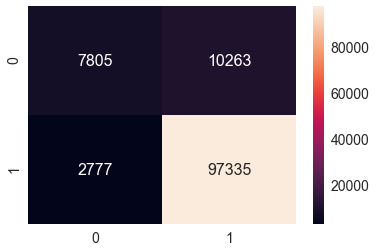

In [29]:
%%time
import seaborn as sns
#Testing Accuracy on Test data
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C= 500, penalty= 'l2')
alogo.fit(train_sent_vectors,y_train)
y_pred = alogo.predict(Test_sent_vectors)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test data set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test data set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test data set: %0.3f"%(f1_score(y_test, y_pred)))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))
print("Confusion Matrix of test data set:\n [ [TN  FN]\n [FP TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

No handles with labels found to put in legend.


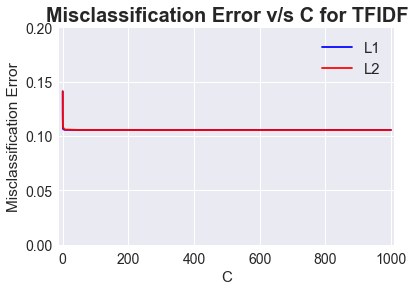

In [31]:
test_score=gsv.cv_results_.get('mean_test_score') 
param=gsv.cv_results_.get('params')
test_score=test_score.tolist()
scores=list(zip(test_score,param))
warnings.filterwarnings('ignore')
error_vs_c(scores)

Here we acn able to see non-zero weight is very much less , so there is no need to test the increasing the lambda value

# Perturbation Test

In [13]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=500, penalty= 'l2')
alogo.fit(train_sent_vectors,y_train)
y_pred = alogo.predict(Test_sent_vectors)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 88.966%
Non Zero weights: 300


In [14]:
from scipy.sparse import find #Return the indices and values of the nonzero elements of a matrix
before_weight=find(alogo.coef_[0])[2]
print(before_weight[:10])

[-3.77956388  0.94747395 -5.42930702 -2.95769524  3.79017118 -3.53226203
 -1.87701542 -0.87139399 -2.58738168  2.29500582]


In [ ]:
pre_X_train=train_sent_vectors
epsilon = np.random.normal(loc=0.0, scale=0.000000001, size=(find(pre_X_train)[0].size,))
i,j,v = find(pre_X_train)
pre_X_train[i,j]=pre_X_train[i,j]+epsilon #adding noise to he small nosie N(0,0.000000001) to training data

In [19]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=500, penalty= 'l2')
alogo.fit(pre_X_train,y_train)
y_pred = alogo.predict(Test_sent_vectors)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 88.966%
Non Zero weights: 300


In [20]:
After_weight=find(alogo.coef_[0])[2]

In [22]:
weights_diff = (abs(before_weight - After_weight)/before_weight) * 100
print(weights_diff)

[65.18078178 65.33855026 29.07439108 ... 69.5781033  21.3151206
 21.31512055]

In [23]:
print(weights_diff[np.where(weights_diff > 40)].size)

32

Here we can able to see 32 feature are multicolinear in Avgw2v technique

# TFIDF-W2V

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
tfidf = TfidfVectorizer(ngram_range=(1,1)) #Using bi-grams
tfidf_vec = tfidf.fit_transform(X_train)

In [9]:
train_list_of_sent=import1('train_list_of_sent')
Test_list_of_sent=import1('Test_list_of_sent')

In [10]:
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))

In [11]:
%%time
# TF-IDF weighted Word2Vec
# tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
train_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(train_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            #print(vec)
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = dictionary[word]*sent.count(word)
            #print()
            sent_vec += (vec * tf_idf)
            #print(sent_vec)
            #print(tfidf)
            #print(sent_vec)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    train_tfidf_sent_vectors.append(sent_vec)
    row += 1
    

100%|█████████████████████████████████| 275751/275751 [06:43<00:00, 682.96it/s]


Wall time: 6min 53s


In [19]:
train_tfidf_sent_vectors = np.array(train_tfidf_sent_vectors)

In [21]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values='NaN', strategy='median')
train_sent_vectors = mean_imputer.fit_transform(train_tfidf_sent_vectors)

In [17]:
export(train_tfidf_sent_vectors,'train_tfidf_sent_vectors')

In [18]:
%%time
# TF-IDF weighted Word2Vec
# tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
test_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(Test_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            #print(vec)
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = dictionary[word]*sent.count(word)
            #print()
            sent_vec += (vec * tf_idf)
            #print(sent_vec)
            #print(tfidf)
            #print(sent_vec)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    test_tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|█████████████████████████████████| 118180/118180 [03:11<00:00, 615.63it/s]


Wall time: 3min 11s


In [22]:
test_tfidf_sent_vectors = np.array(test_tfidf_sent_vectors)

In [24]:
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values='NaN', strategy='median')
test_tfidf_sent_vectors = mean_imputer.fit_transform(test_tfidf_sent_vectors)

In [25]:
export(test_tfidf_sent_vectors,'test_tfidf_sent_vectors')

# GridSearchCV

In [28]:
alogo = LogisticRegression()
#params we need to try on classifier
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(alogo,param_grid,cv=timesplit,verbose=1,n_jobs=-1)
gsv.fit(train_sent_vectors,y_train)
export(gsv,"gsv_bigram")
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 161.0min finished


Best HyperParameter:  {'C': 5, 'penalty': 'l1'}
Best Accuracy: 88.12%


Accuracy on test data set: 87.511%
Precision on test data set: 0.888
Recall on test data set: 0.975
F1-Score on test data set: 0.930
Non Zero weights: 300
Confusion Matrix of test data set:
 [ [TN  FN]
 [FP TP] ]

Wall time: 9min 10s


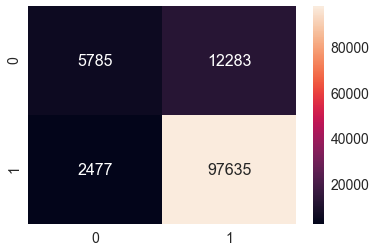

In [30]:
%%time
import seaborn as sns
#Testing Accuracy on Test data
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C= 5, penalty= 'l1')
alogo.fit(train_sent_vectors,y_train)
y_pred = alogo.predict(test_tfidf_sent_vectors)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test data set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test data set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test data set: %0.3f"%(f1_score(y_test, y_pred)))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))
print("Confusion Matrix of test data set:\n [ [TN  FN]\n [FP TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

No handles with labels found to put in legend.


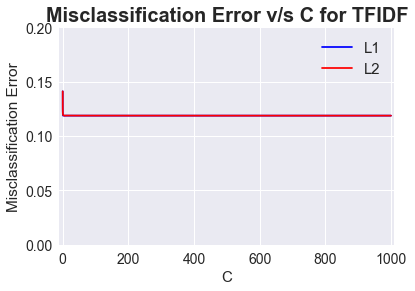

In [32]:
test_score=gsv.cv_results_.get('mean_test_score') 
param=gsv.cv_results_.get('params')
test_score=test_score.tolist()
scores=list(zip(test_score,param))
warnings.filterwarnings('ignore')
error_vs_c(scores)

# Perturbation Test

In [33]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=5, penalty= 'l1')
alogo.fit(train_sent_vectors,y_train)
y_pred = alogo.predict(test_tfidf_sent_vectors)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 87.510%
Non Zero weights: 300


In [34]:
from scipy.sparse import find #Return the indices and values of the nonzero elements of a matrix
before_weight=find(alogo.coef_[0])[2]
print(before_weight[:10])

[-2.67736886 -0.02148383 -3.7184042  -1.02838686  0.77322786 -1.85229499
 -0.93928203 -1.87662538 -0.32864669  0.82659901]


In [35]:
pre_X_train=train_sent_vectors
epsilon = np.random.normal(loc=0.0, scale=0.000000001, size=(find(pre_X_train)[0].size,))
i,j,v = find(pre_X_train)
pre_X_train[i,j]=pre_X_train[i,j]+epsilon #adding noise to he small nosie N(0,0.000000001) to training data

In [36]:
from sklearn.linear_model import LogisticRegression

alogo = LogisticRegression(C=5, penalty= 'l1')
alogo.fit(pre_X_train,y_train)
y_pred = alogo.predict(test_tfidf_sent_vectors)
print("Accuracy on test data set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Non Zero weights:",np.count_nonzero(alogo.coef_))

Accuracy on test data set: 87.512%
Non Zero weights: 300


In [37]:
After_weight=find(alogo.coef_[0])[2]

In [39]:
weights_diff = (abs(before_weight - After_weight)/before_weight) * 100

In [41]:
print(weights_diff[np.where(weights_diff > 10)].size)

2


As per the tfidfw2v model there is no much multicolinearlty avilable

# Performance Table

In [46]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","hyper parameter/ c","Penality", "Train Accuracy","Test Accuracy","F1-Score"]

x.add_row(["BOW", 50, "l2" , "91.98%" , "92.328%",0.955])
x.add_row(["TF-IDF",1000, "l2", "92.05%" , "92.277%",0.955])
x.add_row(["Avg w2v", 500,"l2", "89.45%" , "88.966%",0.937])
x.add_row(["Tfidf-w2v", 5,"l1", "88.12%" , "87.511%",0.930])


print(x)

+-----------+--------------------+----------+----------------+---------------+----------+
|   Model   | hyper parameter/ c | Penality | Train Accuracy | Test Accuracy | F1-Score |
+-----------+--------------------+----------+----------------+---------------+----------+
|    BOW    |         50         |    l2    |     91.98%     |    92.328%    |  0.955   |
|   TF-IDF  |        1000        |    l2    |     92.05%     |    92.277%    |  0.955   |
|  Avg w2v  |        500         |    l2    |     89.45%     |    88.966%    |  0.937   |
| Tfidf-w2v |         5          |    l1    |     88.12%     |    87.511%    |   0.93   |
+-----------+--------------------+----------+----------------+---------------+----------+


# Conclusion

1). From the above test we are getting that for Bag of words bigram , logistic regression is predicting failry enough with 92.328% on test dataset . 

2). logistic regression is better compare to the Knn and navie basyes algoithm.

3). Here we used both grid search and Random seach for corss-validation with same param ,and we saw that random search is           quicker than grid search .

4). We have also checked that increasing of lambda value or decreasing of c value in alogorithm , performce is degredding but it     increasing the saprsity on the data , which will very much helpfull in low latency system like google,amzon etc...

5). In Perturbation test we found that some feature are multi colinear in Bow,avgw2c and tfidfw2v , but in tfidf moodel has more     multicolnearlty compare to the other
